<img style="float: left; margin-bottom: 1em" src="images/PRACE.png" width="200">
<img style="float: right; margin-bottom: 1em" src="images/surfsara.png" width="150">
<hr style="clear: both"/>

# Hyperparameter tuning
In this notebook you will learn how the different hyperparameters affect the performance of your network. You will start with a small network and extend and tweak it gradually to improve its performance. 

We have prepared a more complicated problem for you and turned the original two-class classification problem (healthy versus diseased leafs) into a ten-class classification problem. All pictures are taken from tomato plants. Let's load the data set, and display the class names.

In [1]:
import lib

X, Y, labels = lib.dataset_plant_village_tomato()

for index, name in enumerate(labels):
    print('{}: {}'.format(str(index).rjust(2), name))

Using TensorFlow backend.


 0: bacterial-sport
 1: early-blight
 2: late-blight
 3: leaf-mold
 4: septoria-spot
 5: spider-mites
 6: target-spot
 7: yellowleaf-curl-virus
 8: mosaic-virus
 9: healthy


As you can see, we have one healthy class, and nine disease classes.

Let's plot the first 32 examples in the data set:

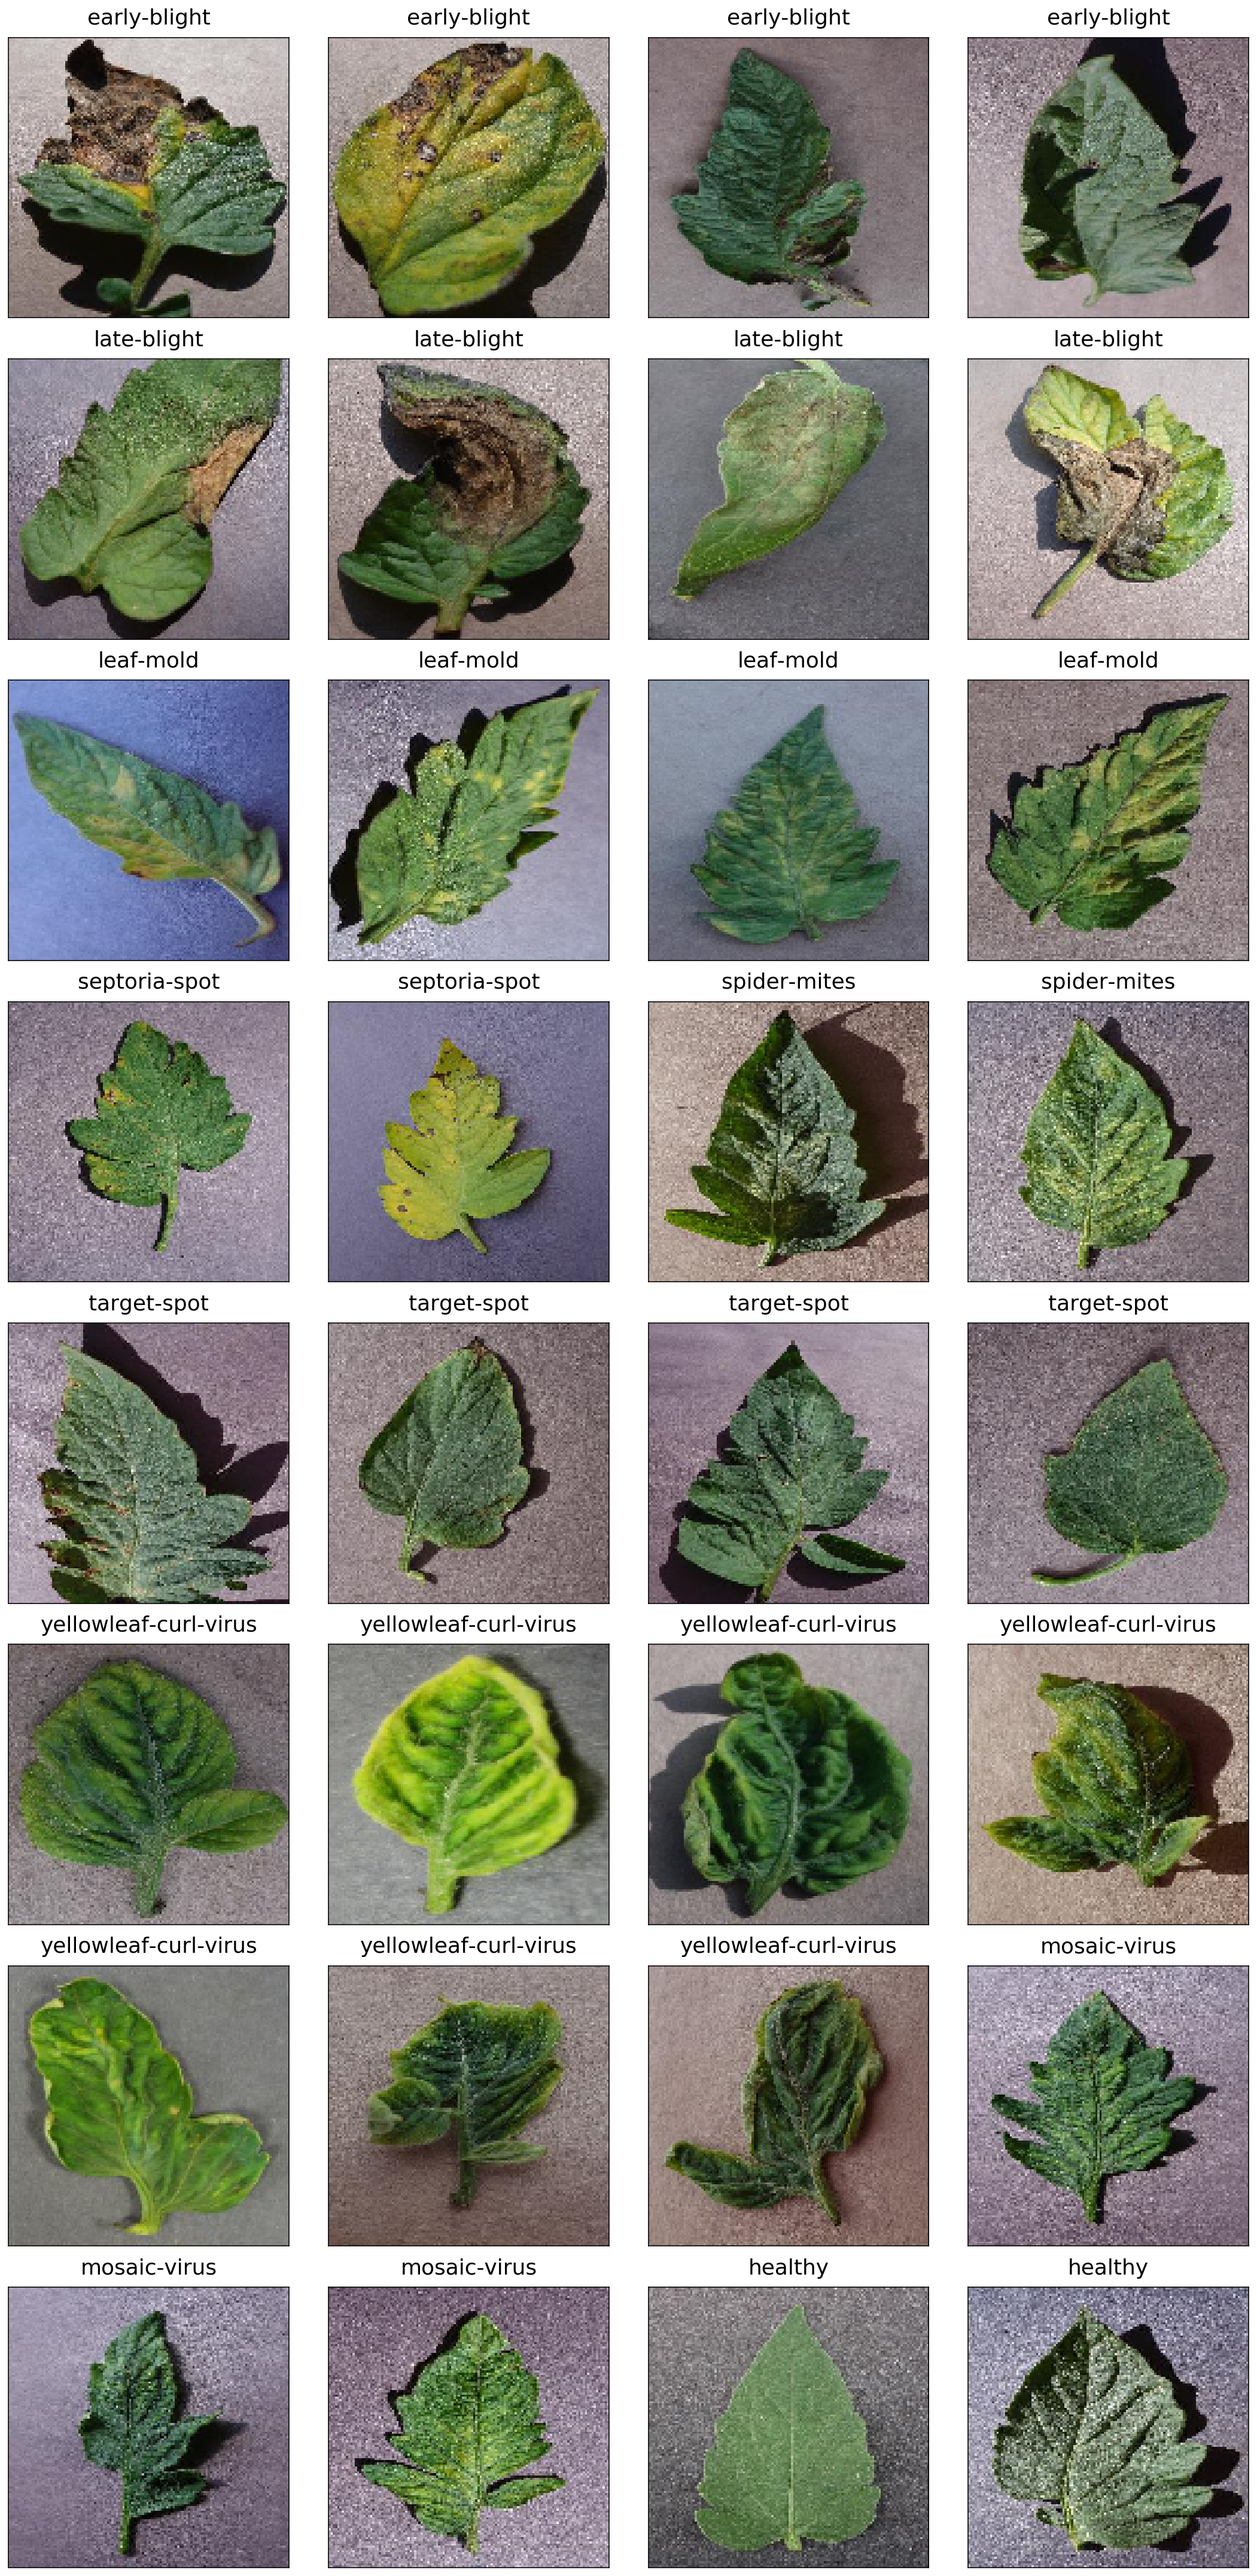

In [2]:
%config InlineBackend.figure_format = 'retina'

lib.plot_examples(X[:32], Y[:32], labels);

Let's inspect the size of the inputs `X` and `Y` using numpy's [`shape`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) method:

In [3]:
print('Shape of input images X: {}'.format(X.shape))
print('Shape of input labels Y: {}'.format(Y.shape))

Shape of input images X: (6367, 128, 128, 3)
Shape of input labels Y: (6367, 10)


## Exercise 1
What is the size (width and height) of the examples, in pixels? How many examples do we have?

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: the dimensions of the images are 128 by 128 pixels, with three colour channels. We have 6367 examples (the first dimension of the data set).

## Exercise 2
Implement a model with a single dense hidden layer with 16 units and ReLU activation by filling out the skeleton below.

**Hints**:
* Go back to the slides to find out the activation functions you will need in the hidden and output layers.
* It may help to keep open the first notebook for reference purposes.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
# <FILL IN>
model.add(Dense(10, activation='softmax'))
model.summary()

In [5]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                786448    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 786,618
Trainable params: 786,618
Non-trainable params: 0
_________________________________________________________________


## Exercise 3
Initialise the Adam optimizer with a learning rate of 0.1 and train the network for 10 epochs by filling out the skeleton below.

Does the network train at all? Why or why not, do you think? Fill in your answer in the cell below.

**Hint**: what would the accuracy be like when we always predict the same class in a ten-class classification problem?

In [6]:
from keras.optimizers import Adam

model.compile(Adam(lr=0.1), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
6367/6367 [==============================] - 1s 226us/step - loss: 14.3734 - acc: 0.1044
Epoch 2/10
6367/6367 [==============================] - 1s 198us/step - loss: 14.4321 - acc: 0.1046
Epoch 3/10
6367/6367 [==============================] - 1s 201us/step - loss: 14.4321 - acc: 0.1046
Epoch 4/10
6367/6367 [==============================] - 1s 201us/step - loss: 14.4321 - acc: 0.1046
Epoch 5/10
6367/6367 [==============================] - 1s 199us/step - loss: 14.4321 - acc: 0.1046
Epoch 6/10
6367/6367 [==============================] - 1s 200us/step - loss: 14.4321 - acc: 0.1046
Epoch 7/10
6367/6367 [==============================] - 1s 202us/step - loss: 14.4321 - acc: 0.1046
Epoch 8/10
6367/6367 [==============================] - 1s 201us/step - loss: 14.4321 - acc: 0.1046
Epoch 9/10
6367/6367 [==============================] - 1s 203us/step - loss: 14.4321 - acc: 0.1046
Epoch 10/10
6367/6367 [=============================

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: the loss stays exactly the same, meaning the network does not train at all.

The classes are slightly imbalanced, such that we do not have 10% examples per class in our data set. Still, if the network would always predict one of the classes no matter the input, we would have an accuracy of around 0.1. The accuracy reported by Keras is 0.1046, which suggests that the network is doing exactly that.

This is a common occurrence when you have a learning rate that is either too high or too low. The only way to deal with this problem is to modify the learning rate and retrain the model.

## Exercise 4
Experiment with the learning rate by changing it in orders of magnitudes (e.g. 0.1, 0.01, 0.001) in the cell below. We have filled out the network definition and number of epochs for you.

What seems to be a good learning rate for this problem? What happens if you make the learning rate too small? Why? Fill in your answer in the cell below.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)

In [ ]:
# FILL IN YOUR ANSWER HERE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                786448    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                170       
Total params: 786,618
Trainable params: 786,618
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
6367/6367 [==============================] - 2s 251us/step - loss: 2.2800 - acc: 0.1300
Epoch 2/25
6367/6367 [==============================] - 1s 195us/step - loss: 2.2312 - acc: 0.1365
Epoch 3/25
6367/6367 [==============================] - 1s 195us/step - loss: 2.1733 - acc: 0.2003
Epoch 4/25
6367/6367 [==============================] - 1s 193us/step - loss: 2.1156 - acc: 0.2395
Epoc

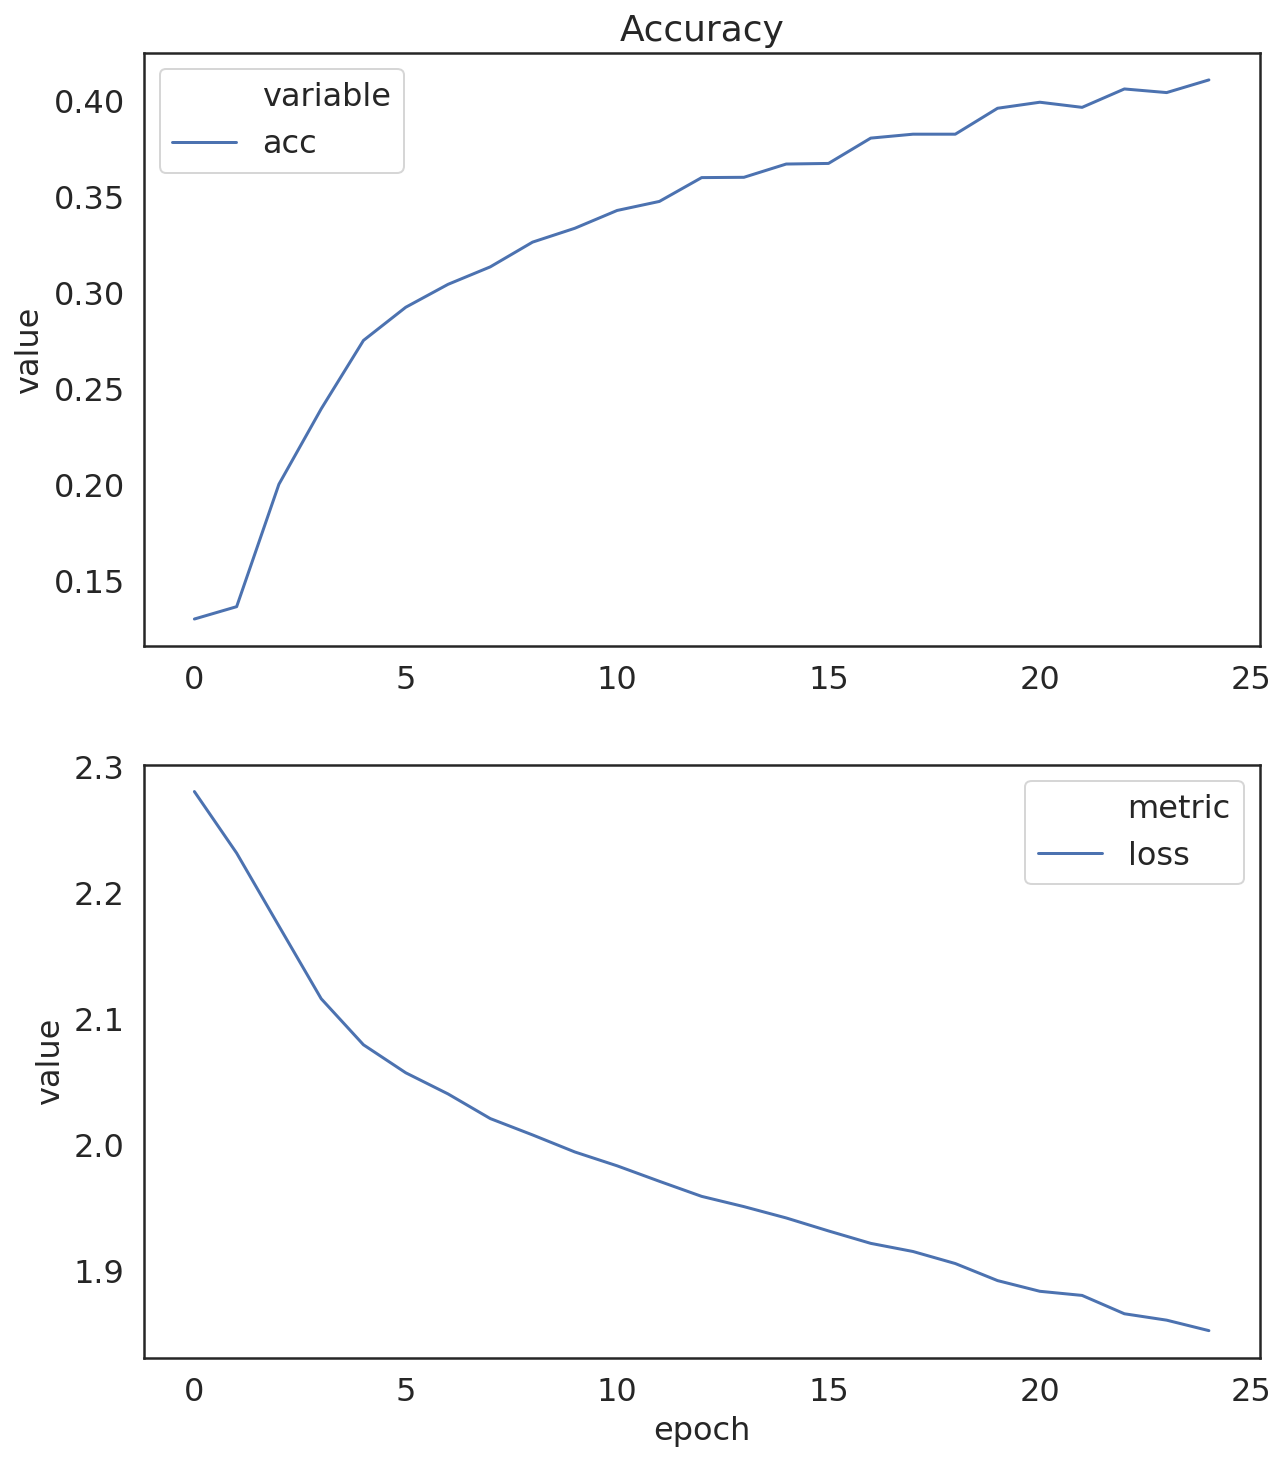

In [12]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)
lib.plot_history(history);

**Answer**: a learning rate of 0.00001 seems to work quite well. A higher learning rate, 0.0001 converges depending on how lucky you are with the optimisation, but the training can stall like it did in exercise 3. Higher learning rates like 0.001 generally do not converge at all.

Very low learning rates, like 0.0000001, still work, but improve the loss very slowly. The Adam optimiser is quite forgiving with respect to the learning rate you specify since it has its own techniques for moving the training forward. Other optimisers may not be as friendly. In general you typically want to see some significant improvements in the first 25 iterations, which is why a learning rate of 0.00001 with an accuracy of ~0.40 at epoch 25, seems reasonable.

## Exercise 5
Our model improves, but slowly. That is because it has low capacity. There is only one hidden layer with a small number of units.

Increase the number of units in the hidden layer and retrain the model by filling out the skeleton below. Try to get the accuracy at epoch 25 greater than or equal to 0.7. How many units do you need? Motivate your answer in the cell below.

**Hint**:
* Use the learning rate that worked for you in exercise 4. Adapt it if you think the model does not converge well enough.
* Increase the number of hidden units by factors of 2 or 4.

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(<FILL IN>, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)
lib.plot_history(history);

In [ ]:
# FILL IN YOUR ANSWER HERE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 49152)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               6291584   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 6,292,874
Trainable params: 6,292,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
6367/6367 [==============================] - 7s 1ms/step - loss: 2.0451 - acc: 0.2796
Epoch 2/25
6367/6367 [==============================] - 7s 1ms/step - loss: 1.7336 - acc: 0.4142
Epoch 3/25
6367/6367 [==============================] - 6s 1ms/step - loss: 1.6009 - acc: 0.4699
Epoch 4/25
6367/6367 [==============================] - 6s 1ms/step - loss: 1.5116 - acc: 0.5097
Epoch 5/

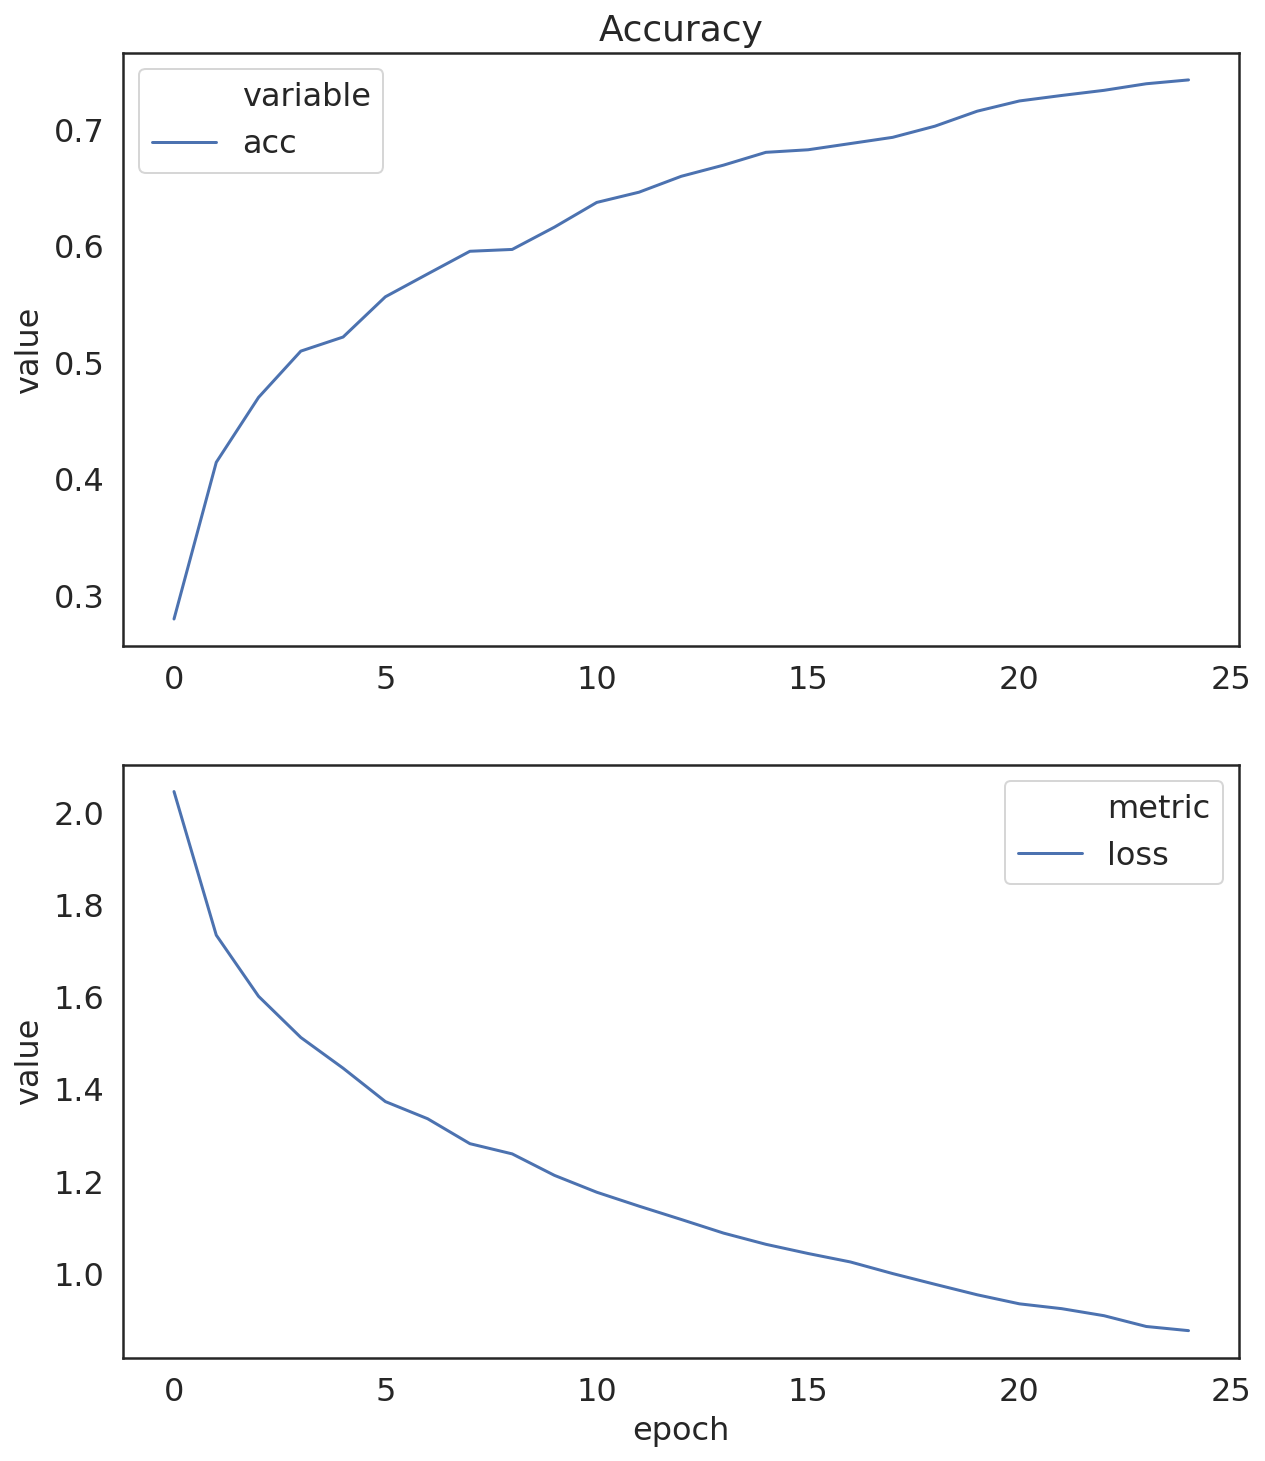

In [17]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25)
lib.plot_history(history);

**Answer**: around 128 units will push your final accuracy beyond 0.7.

## Validation set
We will now introduce a **validation set** into our problem to verify our network and optimizer configuration. This is as simple as providing the Keras [`fit`](https://keras.io/models/sequential/#fit) function with an argument for its `validation_split` parameter. This parameter governs what proportion of the original data set is set aside for validation during training. After each epoch, Keras will run the validation set through the network to obtain the validation loss and accuracy for that epoch.

## Exercise 6
In the following cell we have set this parameter to 0.2, so that 20% of our original data is used for validation. Fill out the network by adding two hidden layers: the first with 512 units, the second with 256. Both should have ReLU activation.

Train the network for 25 epochs with learning rate 0.00001 and batch size 256 (the `batch_size` parameter in Keras's `fit` function). Inspect the resulting accuracy and loss curves. How do you explain the divergence between the training and validation loss and accuracy?

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
<FILL IN>
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=<FILL IN>), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=<FILL IN>, batch_size=<FILL IN>, validation_split=0.2)
lib.plot_history(history);

In [ ]:
# FILL IN YOUR ANSWER HERE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 49152)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               12583168  
_________________________________________________________________
dense_40 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                650       
Total params: 12,600,266
Trainable params: 12,600,266
Non-trainable params: 0
_________________________________________________________________
Train on 5093 samples, validate on 1274 samples
Epoch 1/25
5093/5093 [==============================] - 15s 3ms/step - loss: 2.1391 - acc: 0.2370 - val_loss: 1.9932 - val_acc: 0.3148
Epoch 2/25
5093/5093 [==============================] - 14s 3ms/step - loss: 1.

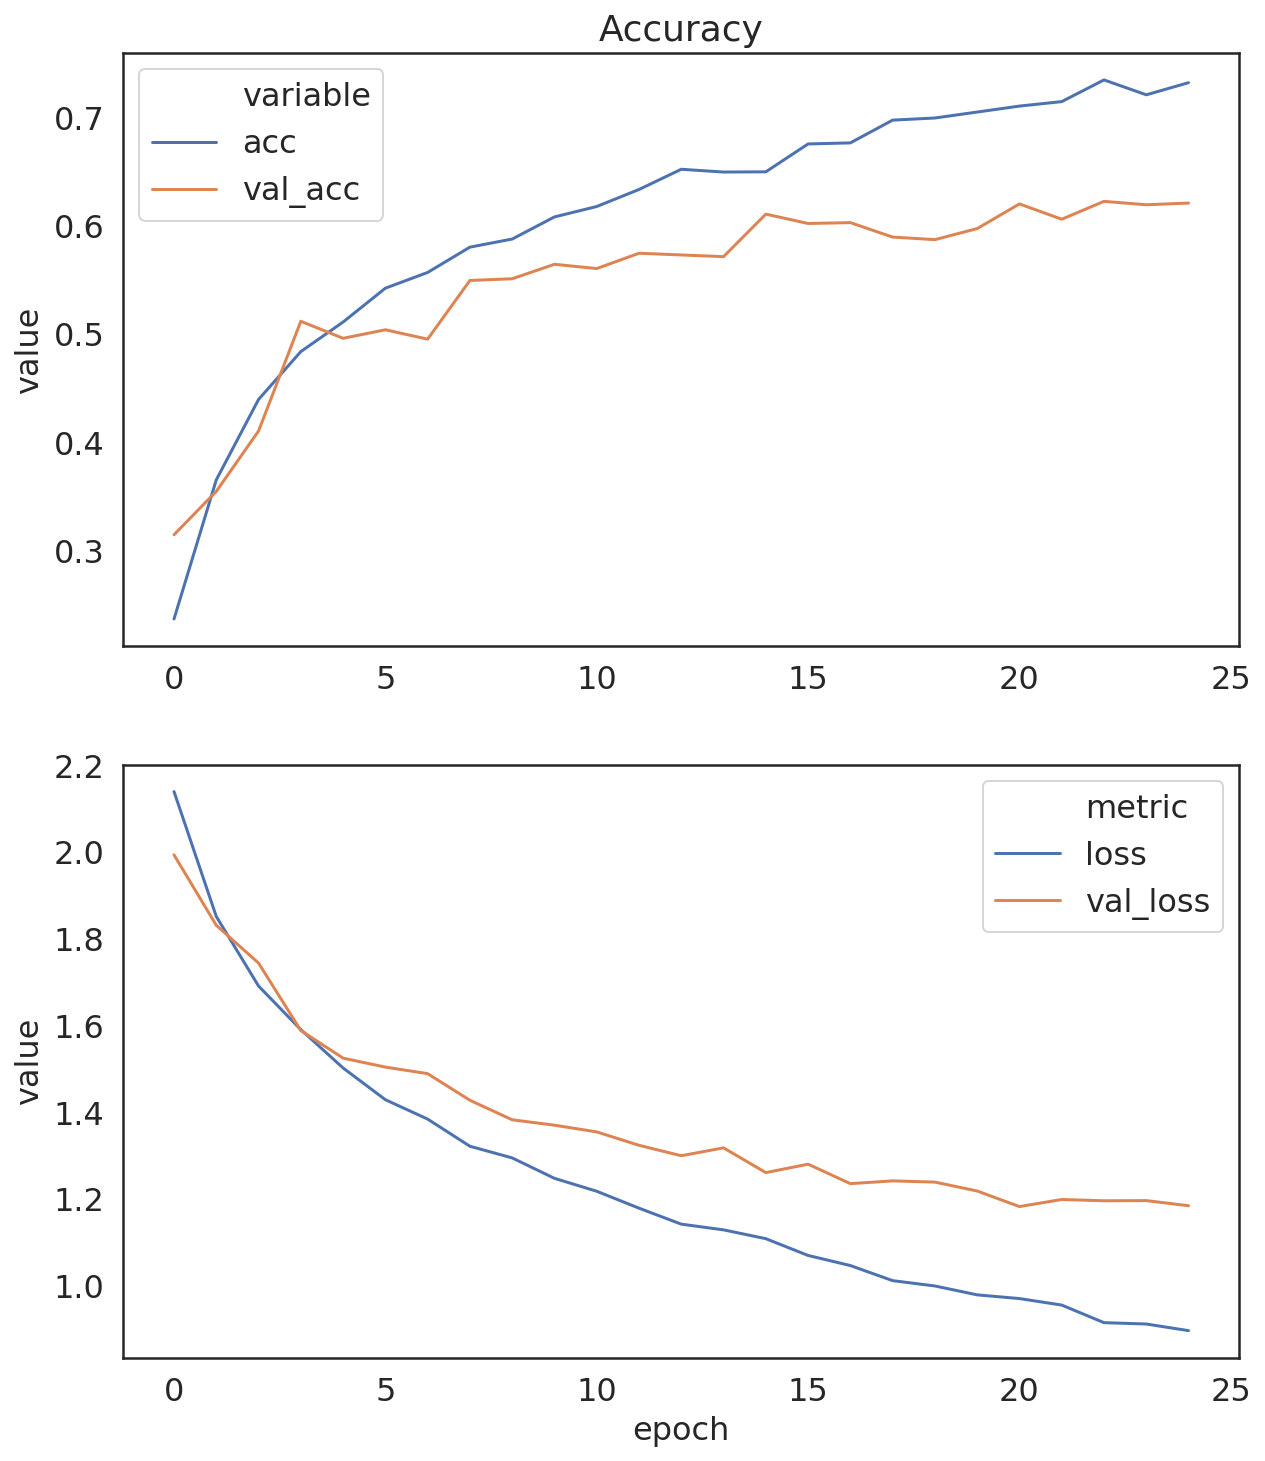

In [24]:
# SOLUTION

from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25, batch_size=32, validation_split=0.2)
lib.plot_history(history);

**Answer**: training and validation loss both decrease until a certain epoch. After epoch <x> the validation loss will start to increase again, whereas the training loss will keep on decreasing. This means the model is overfitting from epoch <x> onwards.

## Bonus exercise (hard)
How many parameters do we have in the first dense layer of exercise 2, and why? Write down your answer in the cell below.

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: we have 786.448 parameters in the first dense layer (our hidden layer). Each unit in that layer has 49.152 incoming connections (the flattened 128 x 128 x 3 image), plus a single bias term. Hence, for 16 units we have 16 * (49.152 weight parameters + 1 bias parameter) = 16 * 49.153 = 786.448 parameters in total.

## Bonus exercise (hard)
Play around with the `batch_size` parameter of the network in the previous cell. What happens with the training speed and network convergence compared with the previous example? Why? Fill in your answer in the cell below.

**Hint**: try to increase or decrease the batch size by factors of 4 or 8. What happens for very low batch sizes (single digits), and what happens with very high batch sizes (triple digits)?

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=X.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, Y, epochs=25, batch_size=512, validation_split=0.2)
lib.plot_history(history);

In [ ]:
# FILL IN YOUR ANSWER HERE

**Answer**: higher batch sizes reduce the training time of the network. That is: more epochs in a fixed amount of time. The disadvantage is that the training process converges more slowly. Hence, there is a trade-off between training speed and rate of convergence. In general, a batch size of 32 seems to be a good balance, but depending on your data set and optimiser you may need to tweak this hyperparameter.